## Identify and collect additional training data to replicate Radke et al.'s research paper on wildfire spread. 
### I. ID & read shapefiles/spatial data using Python
### II. use geopandas to merge heterogenous data sources:
1. Historical **polygonal wildfire perimeters** from GEOMAC. [Shapefile here](https://rmgsc.cr.usgs.gov/outgoing/GeoMAC/) For this project, I selected the **'2018_fire_data' > 'California' fires > 'Camp' fire**.
2. Digital **elevation data** (3DEP) from The National Map
USGS NED 1/3 arc-second Contours for Chico W, California 20181001 1 X 1 degree. [Shapefile here](https://www.sciencebase.gov/catalog/item/5a68b45be4b06e28e9c7056f)

In [26]:
!pip install geopandas
import geopandas as gpd

In [27]:
import pandas as pd
import zipfile
import os

def un_zipFiles(path):
    ''' Function definition to unzip files
    '''
    files=os.listdir(path)
    for file in files:
        if file.endswith('.zip'):
            filePath=path+'/'+file
            zip_file = zipfile.ZipFile(filePath)
            for names in zip_file.namelist():
                zip_file.extract(names,path)
            zip_file.close() 

In [28]:
#unzip historical fire perimeter polygons

# un_zipFiles('./historical_fire_perimeters')

In [29]:
#Read Shapefiles and create GeoDataFrame of historical fire perimeters

file = os.listdir('./historical_fire_perimeters')
path = [os.path.join('./historical_fire_perimeters', i) for i in file if ".shp" in i]

gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)

//anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [30]:
gdf['geometry']

0     POLYGON ((-121.75498 39.70421, -121.75546 39.7...
1     MULTIPOLYGON (((-121.65259 39.60843, -121.6525...
2     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
3     MULTIPOLYGON (((-121.50531 39.66610, -121.5052...
4     MULTIPOLYGON (((-121.65258 39.60844, -121.6525...
5     MULTIPOLYGON (((-121.50531 39.66610, -121.5052...
6     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
7     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
8     MULTIPOLYGON (((-121.50531 39.66610, -121.5052...
9     MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
10    MULTIPOLYGON (((-121.51302 39.64757, -121.5130...
11    MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
12    MULTIPOLYGON (((-121.61493 39.66025, -121.6149...
13    POLYGON ((-121.55830 39.85986, -121.55815 39.8...
14    MULTIPOLYGON (((-121.65260 39.60724, -121.6526...
15    MULTIPOLYGON (((-121.61454 39.66041, -121.6152...
16    MULTIPOLYGON (((-121.51063 39.64221, -121.5106...
17    MULTIPOLYGON (((-121.65260 39.60724, -121.

In [31]:
# this code also works! 'geometry' feature is hidden, however.

# import sys
# from pathlib import Path   

# folder = Path('./historical_fire_perimeters')

# gdf = pd.concat([
#     gpd.read_file(shp)
#     for shp in folder.glob('*.shp')
# ]).pipe(gpd.GeoDataFrame)

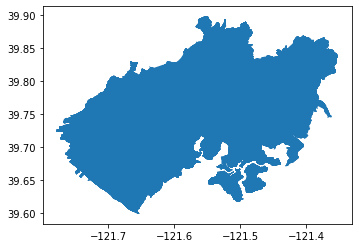

In [32]:
import matplotlib.pyplot as plt
!pip install descartes

gdf.plot();

In [33]:
gdf.iloc[]

SyntaxError: invalid syntax (<ipython-input-33-f96f88e13d4e>, line 1)

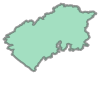

In [34]:
gdf['geometry'].iloc[0]

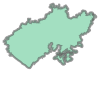

In [35]:
gdf['geometry'].iloc[3]

In [36]:
gdf = gdf.sort_values('GISACRES')

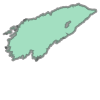

In [37]:
gdf['geometry'].iloc[0]

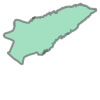

In [38]:
gdf['geometry'].iloc[1]

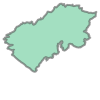

In [39]:
gdf['geometry'].iloc[2]

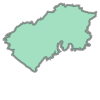

In [40]:
gdf['geometry'].iloc[4]

In [41]:
for i in range(len(gdf)):
    gdf.plot

In [42]:
gdf.dtypes

ComplexNm       object
GISACRES       float64
OBJECTID       float64
SHAPE_Area     float64
active          object
agency          object
comments        object
compParID       object
compfirecd      object
dateCrnt        object
fireName        object
fireNum         object
fireYear        object
firecode        object
geometry      geometry
inComplex       object
incidentID      object
inciwebId       object
irwinid         object
latest          object
mapmethod       object
mergeid         object
perDatTime      object
state           object
unitIDOwn       object
unitIDProt      object
dtype: object

In [43]:
# unzip elevation data 
# un_zipFiles('./digital_elevation_data')

In [44]:
#Read elevation data(Shapefile)
elevation = gpd.read_file('./digital_elevation_data/Shape/Elev_Contour.shp')

In [45]:
elevation.head()

OBJECTID                            Permanent_ Source_Fea  \
0         1  b602ebaf-4ba4-46a9-842b-8d9e7813458d       None   
1         2  e421cef1-9de0-4063-ab2f-f13583438f19       None   
2         3  80561e72-c882-498d-9c41-f721b1a27f68       None   
3         4  c8da074c-5570-4e6a-b443-4379a0eaa9a4       None   
4         5  c00f8f09-0e31-489f-865f-07d0669cdbdf       None   

                             Source_Dat  \
0  8489b4de-ecf7-4aa1-977e-4b5ce8b362ab   
1  2936d811-f2ab-4800-9006-b7e600894971   
2  e727bb9f-259f-4e1e-8422-ba251677ff8d   
3  56ffbd02-9832-4b90-b9f7-936d0be52a73   
4  0fb57a3f-2fb7-45cf-b6c8-9cc117952818   

                                          Source_D_1            Source_Ori  \
0  Contours derived from the National Elevation D...  US Geological Survey   
1  Contours derived from the National Elevation D...  US Geological Survey   
2  Contours derived from the National Elevation D...  US Geological Survey   
3  Contours derived from the National Elevation D...  US Geological Survey   
4  Contours derived from the National Elevation D...  US Geological Survey   

   Data_Secur Distributi    LoadDate  FCode  ContourEle  ContourUni  \
0           5         E4  2018-09-06  10102      2900.0           1   
1           5         E4  2018-09-06  10101      5040.0           1   
2           5         E4  2018-09-06  10102      2500.0           1   
3           5         E4  2018-09-06  10102      1300.0           1   
4           5         E4  2018-09-06  10101      3520.0           1   

   ContourInt  NEDResolut  Cell_ID  Shape_Leng  \
0        20.0        10.0    36872    0.060765   
1        20.0        10.0     7497    0.005447   
2        20.0        10.0    70237    0.015615   
3        20.0        10.0    49633    0.004451   
4        40.0        10.0    43241    0.008897   

                                            geometry  
0  LINESTRING Z (-121.31556 39.50000 0.00000, -12...  
1  LINESTRING Z (-121.14192 39.74544 0.00000, -12...  
2  LINESTRING Z (-121.07771 39.21145 0.00000, -12...  
3  LINESTRING Z (-121.17650 39.00000 0.00000, -12...  
4  LINESTRING Z (-121.53812 39.89761 0.00000, -12...

In [46]:
elevation['geometry']

0        LINESTRING Z (-121.31556 39.50000 0.00000, -12...
1        LINESTRING Z (-121.14192 39.74544 0.00000, -12...
2        LINESTRING Z (-121.07771 39.21145 0.00000, -12...
3        LINESTRING Z (-121.17650 39.00000 0.00000, -12...
4        LINESTRING Z (-121.53812 39.89761 0.00000, -12...
5        LINESTRING Z (-121.34533 39.37500 0.00000, -12...
6        LINESTRING Z (-121.39641 39.65655 0.00000, -12...
7        LINESTRING Z (-121.14160 39.11556 0.00000, -12...
8        MULTILINESTRING Z ((-121.03104 39.37432 0.0000...
9        LINESTRING Z (-121.04201 39.13552 0.00000, -12...
10       MULTILINESTRING Z ((-121.25000 39.69775 0.0000...
11       LINESTRING Z (-121.01164 39.31664 0.00000, -12...
12       LINESTRING Z (-121.86081 39.21298 0.00000, -12...
13       LINESTRING Z (-121.53998 39.62500 0.00000, -12...
14       LINESTRING Z (-121.25000 39.20398 0.00000, -12...
15       LINESTRING Z (-121.72095 39.87500 0.00000, -12...
16       LINESTRING Z (-121.37286 39.37500 0.00000, -12.

In [147]:
df = gpd.sjoin(gdf, elevation, how='inner', op='intersects')

//anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [148]:
df.head()

ComplexNm       GISACRES  OBJECTID_left    SHAPE_Area active agency  \
12      None   54586.432795            NaN           NaN      N    CDF   
15      None   70454.100342            NaN  2.851176e+08      Y    CDF   
21      None  108838.201625            4.0  4.404526e+08      Y    CDF   
24      None  109502.882411            NaN           NaN      N    CDF   
13      None  111552.361975            4.0  4.514364e+08      N    CDF   

          comments compParID compfirecd    dateCrnt  ... Data_Secur  \
12  Topology fixed      None       None  2018-11-09  ...          5   
15  Topology Fixed      None       None  2018-11-09  ...          5   
21            None      None       None  2018-11-10  ...          5   
24            None      None       None  2018-11-10  ...          5   
13            None      None       None  2018-11-11  ...          5   

   Distributi    LoadDate  FCode ContourEle ContourUni ContourInt NEDResolut  \
12         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
15         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
21         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
24         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
13         E4  2018-09-06  10101     3760.0          1       40.0       10.0   

   Cell_ID Shape_Leng  
12   34159   0.003608  
15   34159   0.003608  
21   34159   0.003608  
24   34159   0.003608  
13   34159   0.003608  

[5 rows x 43 columns]

In [ ]:
# this line ran forever, but I wanted to verify that for every unique fire perimeter there
# are multiple elevation values, which makes sense since a single, polygonal perimeter is expected to cover a range of elevations
#df['geometry'].nunique() - 27 unique geometries corresponding to 27 unique polygons

In [149]:
df.shape

(63632, 43)

In [150]:
df

ComplexNm       GISACRES  OBJECTID_left    SHAPE_Area active agency  \
12      None   54586.432795            NaN           NaN      N    CDF   
15      None   70454.100342            NaN  2.851176e+08      Y    CDF   
21      None  108838.201625            4.0  4.404526e+08      Y    CDF   
24      None  109502.882411            NaN           NaN      N    CDF   
13      None  111552.361975            4.0  4.514364e+08      N    CDF   
0       None  114866.207880            NaN           NaN      Y    CDF   
16      None  128799.057737            NaN           NaN      N    CDF   
1       None  128816.409733            NaN           NaN      N    CDF   
10      None  130394.422837            NaN           NaN      Y    CDF   
4       None  136635.531759            NaN           NaN      N    CDF   
22      None  138127.038490            NaN           NaN      Y    CDF   
25      None  142806.784678            NaN           NaN      N    CDF   
26      None  145134.810595            NaN           NaN      N    CDF   
8       None  145254.236747            NaN           NaN      Y    CDF   
2       None  148238.313415            NaN           NaN      Y    CDF   
5       None  149511.762816            NaN           NaN      Y    CDF   
23      None  149688.698171            NaN           NaN      N    CDF   
17      None  150628.489494            NaN           NaN      Y    CDF   
6       None  150690.410067            NaN           NaN      N    CDF   
11      None  151428.782110            NaN           NaN      N    CDF   
20      None  151472.373839            NaN           NaN      Y    CDF   
27      None  151514.980202            NaN           NaN      Y    CDF   
3       None  151575.190501            NaN           NaN      Y    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
12      None   54586.432795            NaN           NaN      N    CDF   
15      None   70454.100342            NaN  2.851176e+08      Y    CDF   
..       ...            ...            ...           ...    ...    ...   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7      

In [151]:
df.columns

Index(['ComplexNm', 'GISACRES', 'OBJECTID_left', 'SHAPE_Area', 'active',
       'agency', 'comments', 'compParID', 'compfirecd', 'dateCrnt', 'fireName',
       'fireNum', 'fireYear', 'firecode', 'geometry', 'inComplex',
       'incidentID', 'inciwebId', 'irwinid', 'latest', 'mapmethod', 'mergeid',
       'perDatTime', 'state', 'unitIDOwn', 'unitIDProt', 'index_right',
       'OBJECTID_right', 'Permanent_', 'Source_Fea', 'Source_Dat',
       'Source_D_1', 'Source_Ori', 'Data_Secur', 'Distributi', 'LoadDate',
       'FCode', 'ContourEle', 'ContourUni', 'ContourInt', 'NEDResolut',
       'Cell_ID', 'Shape_Leng'],
      dtype='object')

In [171]:
import numpy as np

In [172]:
from sklearn.model_selection import train_test_split

In [430]:
mask1 = (df['dateCrnt'] <= '2018-11-18')
train = df[mask1]

In [431]:
mask2 = (df['dateCrnt'] > '2018-11-18') & (df['dateCrnt'] <= '2018-11-22')
val = df[mask2]

In [197]:
train.shape, val.shape

((40515, 42), (20536, 42))

In [198]:
train.head()

ComplexNm       GISACRES  OBJECTID_left    SHAPE_Area active agency  \
12      None   54586.432795            NaN           NaN      N    CDF   
15      None   70454.100342            NaN  2.851176e+08      Y    CDF   
21      None  108838.201625            4.0  4.404526e+08      Y    CDF   
24      None  109502.882411            NaN           NaN      N    CDF   
13      None  111552.361975            4.0  4.514364e+08      N    CDF   

          comments compParID compfirecd    dateCrnt  ... Data_Secur  \
12  Topology fixed      None       None  2018-11-09  ...          5   
15  Topology Fixed      None       None  2018-11-09  ...          5   
21            None      None       None  2018-11-10  ...          5   
24            None      None       None  2018-11-10  ...          5   
13            None      None       None  2018-11-11  ...          5   

   Distributi    LoadDate  FCode ContourEle ContourUni ContourInt NEDResolut  \
12         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
15         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
21         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
24         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
13         E4  2018-09-06  10101     3760.0          1       40.0       10.0   

   Cell_ID Shape_Leng  
12   34159   0.003608  
15   34159   0.003608  
21   34159   0.003608  
24   34159   0.003608  
13   34159   0.003608  

[5 rows x 42 columns]

In [199]:
train.describe()

GISACRES  OBJECTID_left    SHAPE_Area  OBJECTID_right  Data_Secur  \
count   40515.000000         3676.0  4.770000e+03    40515.000000     40515.0   
mean   132824.690756            4.0  4.091164e+08    15206.876071         5.0   
std     21286.730429            0.0  6.782407e+07     8671.993969         0.0   
min     54586.432795            4.0  2.851176e+08       20.000000         5.0   
25%    128799.057737            4.0  4.404526e+08     7631.500000         5.0   
50%    138127.038490            4.0  4.404526e+08    15231.000000         5.0   
75%    149511.762816            4.0  4.514364e+08    22937.000000         5.0   
max    151575.190501            4.0  4.514364e+08    29943.000000         5.0   

              FCode    ContourEle  ContourUni    ContourInt  NEDResolut  \
count  40515.000000  40515.000000     40515.0  40515.000000     40515.0   
mean   10101.202320   1700.903863         1.0     31.948167        10.0   
std        0.413542   1004.777042         0.0     18.273408         0.0   
min    10101.000000    180.000000         1.0     10.000000        10.0   
25%    10101.000000    840.000000         1.0     20.000000        10.0   
50%    10101.000000   1600.000000         1.0     20.000000        10.0   
75%    10101.000000   2360.000000         1.0     40.000000        10.0   
max    10104.000000   5120.000000         1.0     80.000000        10.0   

            Cell_ID    Shape_Leng  
count  40515.000000  40515.000000  
mean   19352.383734      0.098649  
std    12880.705251      0.162377  
min     3477.000000      0.000176  
25%     8336.000000      0.004896  
50%    19102.000000      0.016255  
75%    34159.000000      0.127963  
max    43241.000000      0.940084

In [200]:
train['dateCrnt'].value_counts()

2018-11-17    5056
2018-11-16    5039
2018-11-15    4999
2018-11-14    4753
2018-11-13    4408
2018-11-12    4274
2018-11-11    3777
2018-11-10    3645
2018-11-18    2540
2018-11-09    2024
Name: dateCrnt, dtype: int64

In [201]:
val['dateCrnt'].value_counts()

2018-11-19    7654
2018-11-21    5158
2018-11-20    5143
2018-11-22    2581
Name: dateCrnt, dtype: int64

In [202]:
print(train.columns)
print(val.columns)

Index(['ComplexNm', 'GISACRES', 'OBJECTID_left', 'SHAPE_Area', 'active',
       'agency', 'comments', 'compParID', 'compfirecd', 'dateCrnt', 'fireName',
       'fireNum', 'fireYear', 'firecode', 'geometry', 'inComplex',
       'incidentID', 'inciwebId', 'irwinid', 'latest', 'mapmethod', 'mergeid',
       'perDatTime', 'state', 'unitIDOwn', 'unitIDProt', 'OBJECTID_right',
       'Permanent_', 'Source_Fea', 'Source_Dat', 'Source_D_1', 'Source_Ori',
       'Data_Secur', 'Distributi', 'LoadDate', 'FCode', 'ContourEle',
       'ContourUni', 'ContourInt', 'NEDResolut', 'Cell_ID', 'Shape_Leng'],
      dtype='object')
Index(['ComplexNm', 'GISACRES', 'OBJECTID_left', 'SHAPE_Area', 'active',
       'agency', 'comments', 'compParID', 'compfirecd', 'dateCrnt', 'fireName',
       'fireNum', 'fireYear', 'firecode', 'geometry', 'inComplex',
       'incidentID', 'inciwebId', 'irwinid', 'latest', 'mapmethod', 'mergeid',
       'perDatTime', 'state', 'unitIDOwn', 'unitIDProt', 'OBJECTID_right',
       '

# baseline model

In [203]:
#always begin with a baseline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_train = train['GISACRES']
y_val = val['GISACRES']
y_pred_train = [y_train.mean()] * len(y_train)
y_pred_val  = [y_train.mean()] * len(y_val)

print('Mean Baseline:')
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Validation Root Mean Square Error:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Validation Mean Absolute Error:', mean_absolute_error(y_val, y_pred_val))
print('Train R^2 Score:', r2_score(y_train, y_pred_train))
print('Validation R^2 Score:', r2_score(y_val, y_pred_val))

Mean Baseline:
Train Root Mean Squared Error: 21286.46772521456
Validation Root Mean Square Error: 19369.62836651568
Train Mean Absolute Error: 15972.043995834194
Validation Mean Absolute Error: 19346.28536126098
Train R^2 Score: 0.0
Validation R^2 Score: -414.14163867883684


### A training R^2 score of 0% represents a model that does not explain any of the variation in the response variable around its mean. 

In [210]:
target = 'GISACRES'
X_train = train.drop(columns=[target, 'perDatTime', 'geometry', 'LoadDate', 'dateCrnt'])
y_train = train[target]

X_val = val.drop(columns=[target, 'perDatTime', 'geometry', 'LoadDate', 'dateCrnt'])
y_val = val[target]


X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40515, 37), (40515,), (20536, 37), (20536,))

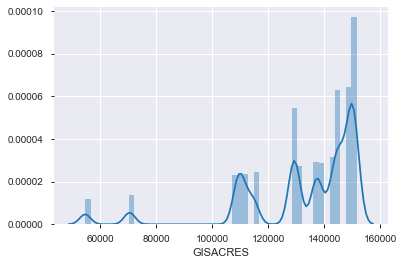

In [211]:
%matplotlib inline
import seaborn as sns
sns.distplot(train['GISACRES']);

In [223]:
import pandas as pd
X = pd.DataFrame(X_train)
y = pd.DataFrame(y_train)

In [231]:
X.dtypes

ComplexNm          object
OBJECTID_left     float64
SHAPE_Area        float64
active             object
agency             object
comments           object
compParID          object
compfirecd         object
fireName           object
fireNum            object
fireYear           object
firecode           object
inComplex          object
incidentID         object
inciwebId          object
irwinid            object
latest             object
mapmethod          object
mergeid            object
state              object
unitIDOwn          object
unitIDProt         object
OBJECTID_right      int64
Permanent_         object
Source_Fea         object
Source_Dat         object
Source_D_1         object
Source_Ori         object
Data_Secur          int64
Distributi         object
FCode               int64
ContourEle        float64
ContourUni          int64
ContourInt        float64
NEDResolut        float64
Cell_ID             int64
Shape_Leng        float64
dtype: object

In [228]:
y.dtypes

GISACRES    float64
dtype: object

In [235]:
features = ['ContourEle','FCode','ContourUni', 'ContourInt']
X = X[features]

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [237]:
X_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(y_val)

In [238]:
X_val = X_val[features]

In [239]:
X_val

ContourEle  FCode  ContourUni  ContourInt
6       3760.0  10101           1        40.0
11      3760.0  10101           1        40.0
20      3760.0  10101           1        40.0
27      3760.0  10101           1        40.0
18      3760.0  10101           1        40.0
19      3760.0  10101           1        40.0
9       3760.0  10101           1        40.0
14      3760.0  10101           1        40.0
6       3720.0  10101           1        40.0
11      3720.0  10101           1        40.0
20      3720.0  10101           1        40.0
27      3720.0  10101           1        40.0
18      3720.0  10101           1        40.0
19      3720.0  10101           1        40.0
9       3720.0  10101           1        40.0
14      3720.0  10101           1        40.0
6       3680.0  10101           1        40.0
11      3680.0  10101           1        40.0
20      3680.0  10101           1        40.0
27      3680.0  10101           1        40.0
18      3680.0  10101           1        40.0
19      3680.0  10101           1        40.0
9       3680.0  10101           1        40.0
14      3680.0  10101           1        40.0
6       3760.0  10101           1        80.0
11      3760.0  10101           1        80.0
20      3760.0  10101           1        80.0
27      3760.0  10101           1        80.0
18      3760.0  10101           1        80.0
19      3760.0  10101           1        80.0
..         ...    ...         ...         ...
18      2760.0  10101           1        40.0
19      2760.0  10101           1        40.0
9       2760.0  10101           1        40.0
14      2760.0  10101           1        40.0
18      2880.0  10101           1        40.0
19      2880.0  10101           1        40.0
9       2880.0  10101           1        40.0
14      2880.0  10101           1        40.0
18      3000.0  10102           1        40.0
19      3000.0  10102           1        40.0
9       3000.0  10102           1        40.0
14      3000.0  10102           1        40.0
18      3120.0  10101           1        40.0
19      3120.0  10101           1        40.0
9       3120.0  10101           1        40.0
14      3120.0  10101           1        40.0
18      3120.0  10101           1        40.0
19      3120.0  10101           1        40.0
9       3120.0  10101           1        40.0
14      3120.0  10101           1        40.0
18      2200.0  10102           1        40.0
19      2200.0  10102           1        40.0
9       2200.0  10102           1        40.0
14      2200.0  10102           1        40.0
9       2400.0  10102           1        80.0
14      2400.0  10102           1        80.0
9       2320.0  10101           1        80.0
14      2320.0  10101           1        80.0
9       2960.0  10101           1        40.0
14      2960.0  10101           1        40.0

[20536 rows x 4 columns]

In [241]:
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validate MAE: {mae}')

Validate MAE: 19142.2621118015


In [243]:
print('Intercept', model.intercept_)

Intercept [-421582.30703887]


In [245]:
model.coef_

array([[ 1.31399644, 54.62990057,  0.        , 10.77801366]])

In [246]:
coefficients = pd.Series(model.coef_[0], features)
print(coefficients)

ContourEle     1.313996
FCode         54.629901
ContourUni     0.000000
ContourInt    10.778014
dtype: float64


In [247]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = make_pipeline( 
    SimpleImputer(), 
    StandardScaler(), 
    Ridge()
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'ridge__alpha': [0.1, 1, 10], 
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X, y);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


//anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    8.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.5s finished


In [248]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean', 'ridge__alpha': 10}
Cross-validation MAE 16408.821757754773


In [249]:
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline( 
    SimpleImputer(strategy='mean'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X, y, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

//anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
//anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
//anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


MAE for 3 folds: [19370.09444409 15921.03847334 15238.19676208]


In [250]:
-scores.mean()

16843.109893168566

In [251]:
print(train.shape)
train.head()

(40515, 42)


ComplexNm       GISACRES  OBJECTID_left    SHAPE_Area active agency  \
12      None   54586.432795            NaN           NaN      N    CDF   
15      None   70454.100342            NaN  2.851176e+08      Y    CDF   
21      None  108838.201625            4.0  4.404526e+08      Y    CDF   
24      None  109502.882411            NaN           NaN      N    CDF   
13      None  111552.361975            4.0  4.514364e+08      N    CDF   

          comments compParID compfirecd    dateCrnt  ... Data_Secur  \
12  Topology fixed      None       None  2018-11-09  ...          5   
15  Topology Fixed      None       None  2018-11-09  ...          5   
21            None      None       None  2018-11-10  ...          5   
24            None      None       None  2018-11-10  ...          5   
13            None      None       None  2018-11-11  ...          5   

   Distributi    LoadDate  FCode ContourEle ContourUni ContourInt NEDResolut  \
12         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
15         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
21         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
24         E4  2018-09-06  10101     3760.0          1       40.0       10.0   
13         E4  2018-09-06  10101     3760.0          1       40.0       10.0   

   Cell_ID Shape_Leng  
12   34159   0.003608  
15   34159   0.003608  
21   34159   0.003608  
24   34159   0.003608  
13   34159   0.003608  

[5 rows x 42 columns]

In [252]:
print(val.shape)
val.head()

(20536, 42)


ComplexNm       GISACRES  OBJECTID_left  SHAPE_Area active agency comments  \
6       None  150690.410067            NaN         NaN      N    CDF     None   
11      None  151428.782110            NaN         NaN      N    CDF     None   
20      None  151472.373839            NaN         NaN      Y    CDF     None   
27      None  151514.980202            NaN         NaN      Y    CDF     None   
18      None  152687.786897            NaN         NaN      Y    CDF     None   

   compParID compfirecd    dateCrnt  ... Data_Secur Distributi    LoadDate  \
6       None       None  2018-11-19  ...          5         E4  2018-09-06   
11      None       None  2018-11-19  ...          5         E4  2018-09-06   
20      None       None  2018-11-19  ...          5         E4  2018-09-06   
27      None       None  2018-11-20  ...          5         E4  2018-09-06   
18      None       None  2018-11-21  ...          5         E4  2018-09-06   

    FCode ContourEle ContourUni ContourInt NEDResolut Cell_ID Shape_Leng  
6   10101     3760.0          1       40.0       10.0   34159   0.003608  
11  10101     3760.0          1       40.0       10.0   34159   0.003608  
20  10101     3760.0          1       40.0       10.0   34159   0.003608  
27  10101     3760.0          1       40.0       10.0   34159   0.003608  
18  10101     3760.0          1       40.0       10.0   34159   0.003608  

[5 rows x 42 columns]

In [448]:
usgs = pd.read_csv('./SPL4SMGP-004-Statistics.csv')
print(usgs.shape)
usgs.head()

(20737, 16)


File Name  \
0  SPL4SMGP_004_Geophysical_Data_baseflow_flux_0_...   
1  SPL4SMGP_004_Geophysical_Data_baseflow_flux_1_...   
2  SPL4SMGP_004_Geophysical_Data_baseflow_flux_2_...   
3  SPL4SMGP_004_Geophysical_Data_baseflow_flux_3_...   
4  SPL4SMGP_004_Geophysical_Data_baseflow_flux_4_...   

                          Dataset      aid      Date  Count  Minimum  Maximum  \
0  Geophysical_Data_baseflow_flux  aid0001  10/15/18      8      0.0      0.0   
1  Geophysical_Data_baseflow_flux  aid0001  10/15/18      8      0.0      0.0   
2  Geophysical_Data_baseflow_flux  aid0001  10/15/18      8      0.0      0.0   
3  Geophysical_Data_baseflow_flux  aid0001  10/15/18      8      0.0      0.0   
4  Geophysical_Data_baseflow_flux  aid0001  10/15/18      8      0.0      0.0   

       Range  Mean  Standard Deviation  Variance  Upper Quartile  \
0  (0.0,0.0)   0.0                 0.0       0.0             0.0   
1  (0.0,0.0)   0.0                 0.0       0.0             0.0   
2  (0.0,0.0)   0.0                 0.0       0.0             0.0   
3  (0.0,0.0)   0.0                 0.0       0.0             0.0   
4  (0.0,0.0)   0.0                 0.0       0.0             0.0   

   Upper 1.5 IQR  Median  Lower 1.5 IQR  Lower Quartile  
0            0.0     0.0            0.0             0.0  
1            0.0     0.0            0.0             0.0  
2            0.0     0.0            0.0             0.0  
3            0.0     0.0            0.0             0.0  
4            0.0     0.0            0.0             0.0

In [449]:
# convert 'date' to datetime dtype
usgs['Date'] = pd.to_datetime(usgs['Date'])

In [450]:
#confirm  'date' converted to datetime format
usgs.dtypes

File Name                     object
Dataset                       object
aid                           object
Date                  datetime64[ns]
Count                          int64
Minimum                      float64
Maximum                      float64
Range                         object
Mean                         float64
Standard Deviation           float64
Variance                     float64
Upper Quartile               float64
Upper 1.5 IQR                float64
Median                       float64
Lower 1.5 IQR                float64
Lower Quartile               float64
dtype: object

In [451]:
usgs.head()

File Name  \
0  SPL4SMGP_004_Geophysical_Data_baseflow_flux_0_...   
1  SPL4SMGP_004_Geophysical_Data_baseflow_flux_1_...   
2  SPL4SMGP_004_Geophysical_Data_baseflow_flux_2_...   
3  SPL4SMGP_004_Geophysical_Data_baseflow_flux_3_...   
4  SPL4SMGP_004_Geophysical_Data_baseflow_flux_4_...   

                          Dataset      aid       Date  Count  Minimum  \
0  Geophysical_Data_baseflow_flux  aid0001 2018-10-15      8      0.0   
1  Geophysical_Data_baseflow_flux  aid0001 2018-10-15      8      0.0   
2  Geophysical_Data_baseflow_flux  aid0001 2018-10-15      8      0.0   
3  Geophysical_Data_baseflow_flux  aid0001 2018-10-15      8      0.0   
4  Geophysical_Data_baseflow_flux  aid0001 2018-10-15      8      0.0   

   Maximum      Range  Mean  Standard Deviation  Variance  Upper Quartile  \
0      0.0  (0.0,0.0)   0.0                 0.0       0.0             0.0   
1      0.0  (0.0,0.0)   0.0                 0.0       0.0             0.0   
2      0.0  (0.0,0.0)   0.0                 0.0       0.0             0.0   
3      0.0  (0.0,0.0)   0.0                 0.0       0.0             0.0   
4      0.0  (0.0,0.0)   0.0                 0.0       0.0             0.0   

   Upper 1.5 IQR  Median  Lower 1.5 IQR  Lower Quartile  
0            0.0     0.0            0.0             0.0  
1            0.0     0.0            0.0             0.0  
2            0.0     0.0            0.0             0.0  
3            0.0     0.0            0.0             0.0  
4            0.0     0.0            0.0             0.0

In [452]:
# convert usgs dataframe into a pivot table
usgs1 = pd.pivot_table(usgs, values=['Mean', 'Standard Deviation', 'Variance'], columns='Dataset', index='Date')

In [453]:
# join the multilevel column headers into one
usgs1.columns = usgs1.columns.map(lambda x: '_'.join([str(i) for i in x]))
usgs1

Mean_Geophysical_Data_baseflow_flux  \
Date                                              
2018-10-15                                  0.0   
2018-10-16                                  0.0   
2018-10-17                                  0.0   
2018-10-18                                  0.0   
2018-10-19                                  0.0   
2018-10-20                                  0.0   
2018-10-21                                  0.0   
2018-10-22                                  0.0   
2018-10-23                                  0.0   
2018-10-24                                  0.0   
2018-10-25                                  0.0   
2018-10-26                                  0.0   
2018-10-27                                  0.0   
2018-10-28                                  0.0   
2018-10-29                                  0.0   
2018-10-30                                  0.0   
2018-10-31                                  0.0   
2018-11-01                                  0.0   
2018-11-02                                  0.0   
2018-11-03                                  0.0   
2018-11-04                                  0.0   
2018-11-05                                  0.0   
2018-11-06                                  0.0   
2018-11-07                                  0.0   
2018-11-08                                  0.0   
2018-11-09                                  0.0   
2018-11-10                                  0.0   
2018-11-11                                  0.0   
2018-11-12                                  0.0   
2018-11-13                                  0.0   
...                                         ...   
2018-11-16                                  0.0   
2018-11-17                                  0.0   
2018-11-18                                  0.0   
2018-11-19                                  0.0   
2018-11-20                                  0.0   
2018-11-21                                  0.0   
2018-11-22                                  0.0   
2018-11-23                                  0.0   
2018-11-24                                  0.0   
2018-11-25                                  0.0   
2018-11-26                                  0.0   
2018-11-27                                  0.0   
2018-11-28                                  0.0   
2018-11-29                                  0.0   
2018-11-30                                  0.0   
2018-12-01                                  0.0   
2018-12-02                                  0.0   
2018-12-03                                  0.0   
2018-12-04                                  0.0   
2018-12-05                                  0.0   
2018-12-06                                  0.0   
2018-12-07                                  0.0   
2018-12-08                                  0.0   
2018-12-09                                  0.0   
2018-12-10                                  0.0   
2018-12-11                                  0.0   
2018-12-12                                  0.0   
2018-12-13                                  0.0   
2018-12-14                                  0.0   
2018-12-15                                  0.0   

            Mean_Geophysical_Data_heat_flux_ground  \
Date                                                 
2018-10-15                               -6.073187   
2018-10-16                                6.577875   
2018-10-17                               -1.420613   
2018-10-18                               -2.346550   
2018-10-19                                5.142862   
2018-10-20                                1.677238   
2018-10-21                               -2.084525   
2018-10-22                               -3.830387   
2018-10-23                              -14.136287   
2018-10-24                               -9.376375   
2018-10-25                                8.058075   
2018-10-26                                4.396275   
2018-10-27                                

In [454]:
usgs1.columns.tolist()

['Mean_Geophysical_Data_baseflow_flux',
 'Mean_Geophysical_Data_heat_flux_ground',
 'Mean_Geophysical_Data_heat_flux_latent',
 'Mean_Geophysical_Data_heat_flux_sensible',
 'Mean_Geophysical_Data_height_lowatmmodlay',
 'Mean_Geophysical_Data_land_evapotranspiration_flux',
 'Mean_Geophysical_Data_land_fraction_saturated',
 'Mean_Geophysical_Data_land_fraction_snow_covered',
 'Mean_Geophysical_Data_land_fraction_unsaturated',
 'Mean_Geophysical_Data_land_fraction_wilting',
 'Mean_Geophysical_Data_leaf_area_index',
 'Mean_Geophysical_Data_net_downward_longwave_flux',
 'Mean_Geophysical_Data_net_downward_shortwave_flux',
 'Mean_Geophysical_Data_overland_runoff_flux',
 'Mean_Geophysical_Data_precipitation_total_surface_flux',
 'Mean_Geophysical_Data_radiation_longwave_absorbed_flux',
 'Mean_Geophysical_Data_radiation_shortwave_downward_flux',
 'Mean_Geophysical_Data_sm_profile',
 'Mean_Geophysical_Data_sm_profile_pctl',
 'Mean_Geophysical_Data_sm_profile_wetness',
 'Mean_Geophysical_Data_sm_

In [457]:
train.dtypes

ComplexNm           object
GISACRES           float64
OBJECTID_left      float64
SHAPE_Area         float64
active              object
agency              object
comments            object
compParID           object
compfirecd          object
dateCrnt            object
fireName            object
fireNum             object
fireYear            object
firecode            object
geometry          geometry
inComplex           object
incidentID          object
inciwebId           object
irwinid             object
latest              object
mapmethod           object
mergeid             object
perDatTime          object
state               object
unitIDOwn           object
unitIDProt          object
OBJECTID_right       int64
Permanent_          object
Source_Fea          object
Source_Dat          object
Source_D_1          object
Source_Ori          object
Data_Secur           int64
Distributi          object
LoadDate            object
FCode                int64
ContourEle         float64
C

In [458]:
def wrangle(X):
    ''' Wrangle train, validate, and test sets in the same way '''
    
    # convert geopandas dataframe into a pandas dataframe
    X = pd.DataFrame(X)
    
    # make a copy of the dataframe
    X = X.copy()
    
    # convert str object into datetime (required for merge later)
    X['dateCrnt'] = pd.to_datetime(X['dateCrnt'])
    
    # remove features without variance/that don't change. Keep relevant features pertaining to elevation data.
    unusable_variance = ['ComplexNm','OBJECTID_left','SHAPE_Area','active','agency','comments','compParID','compfirecd',
                         'fireName','fireNum','fireYear','firecode','geometry','inComplex','incidentID','inciwebId',
                         'irwinid','latest','mapmethod','mergeid','perDatTime','state','unitIDOwn','unitIDProt',
                         'OBJECTID_right','Permanent_','Source_Fea','Source_Dat','Source_D_1','Source_Ori',
                         'Data_Secur','Distributi','LoadDate','FCode','NEDResolut','Cell_ID','Shape_Leng']
    X = X.drop(columns=unusable_variance)
    
    return X

In [459]:
training = wrangle(train)
validation = wrangle(val)

In [460]:
train_clean = pd.merge(training, usgs1, how='left', left_on='dateCrnt', right_on='Date')
val_clean = pd.merge(validation, usgs1, how='left', left_on='dateCrnt', right_on='Date')

In [461]:
train_clean.shape

(40515, 131)

In [462]:
val_clean.shape

(20536, 131)

In [463]:
train_clean.columns

Index(['GISACRES', 'dateCrnt', 'ContourEle', 'ContourUni', 'ContourInt',
       'Mean_Geophysical_Data_baseflow_flux',
       'Mean_Geophysical_Data_heat_flux_ground',
       'Mean_Geophysical_Data_heat_flux_latent',
       'Mean_Geophysical_Data_heat_flux_sensible',
       'Mean_Geophysical_Data_height_lowatmmodlay',
       ...
       'Variance_Geophysical_Data_soil_temp_layer4',
       'Variance_Geophysical_Data_soil_temp_layer5',
       'Variance_Geophysical_Data_soil_temp_layer6',
       'Variance_Geophysical_Data_soil_water_infiltration_flux',
       'Variance_Geophysical_Data_specific_humidity_lowatmmodlay',
       'Variance_Geophysical_Data_surface_pressure',
       'Variance_Geophysical_Data_surface_temp',
       'Variance_Geophysical_Data_temp_lowatmmodlay',
       'Variance_Geophysical_Data_vegetation_greenness_fraction',
       'Variance_Geophysical_Data_windspeed_lowatmmodlay'],
      dtype='object', length=131)

In [464]:
# create pandas profiling report for EDA
ProfileReport(train_clean)

In [465]:
profile1 = ProfileReport(train_clean)
profile1.to_file()

In [466]:
# pandas-profiling report identified a large number of duplicate rows in our dataset. 
# will keep the firs instance of a unique row, but remove duplicate rows thereafter (default parameter) 

train_clean = train_clean.drop_duplicates()
train_clean.shape

(6095, 131)

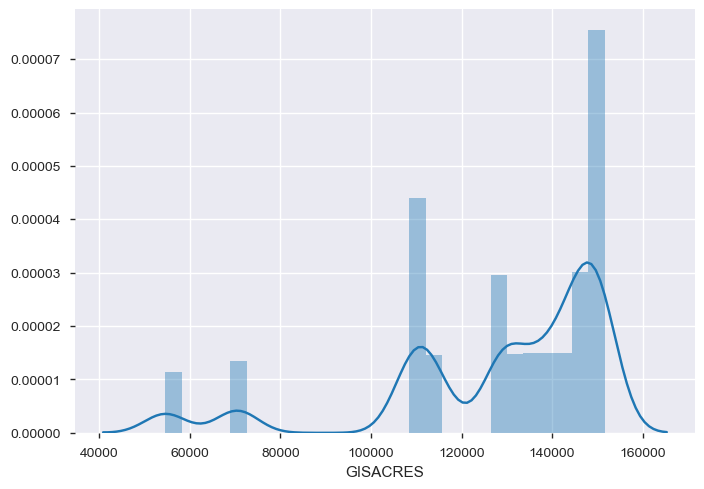

In [467]:
sns.distplot(train_clean['GISACRES']);

In [468]:
val_clean = val_clean.drop_duplicates()
val_clean.shape

(2656, 131)

In [479]:
# 1. Identify target
target = 'GISACRES'
# 2. Arrange X features matrix (independent variables) & y target vector (dependent variable)
X_training = train_clean.drop(columns=[target, 'dateCrnt'])
y_training = train_clean[target]
X_validation = val_clean.drop(columns=[target, 'dateCrnt'])
y_validation = val_clean[target]

# 3. Confirm shape of matrix and vector/series
X_training.shape, y_training.shape, X_validation.shape, y_validation.shape

((6095, 129), (6095,), (2656, 129), (2656,))

In [476]:
model.fit(X_training, y_training)
y_pred = model.predict(X_validation)
mae = mean_absolute_error(y_validation, y_pred)
print(f'Validation MAE: {mae}')

Validation MAE: 34379.58502629737


In [477]:
# conduct cross validation analysis
pipeline = make_pipeline( 
    SimpleImputer(strategy='mean'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_training, y_training, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [2841.20244465 2843.69523934 2575.04140228]


In [478]:
-scores.mean()

2753.3130287550025

In [481]:
# Fit model on trainining data, score on validation data
pipeline.fit(X_training, y_training)
print('Validation Accuracy', -pipeline.score(X_validation, y_validation))

Validation Accuracy 1305.5374238615032


In [98]:
# installing pandas profiling install the following in env:
# conda install -c conda-forge/label/cf201901 pandas-profiling
import pandas_profiling

In [99]:
from pandas_profiling import ProfileReport

In [100]:
# create pandas profiling report for EDA
ProfileReport(df)

In [104]:
profile = ProfileReport(df)

In [107]:
# Write the report to a file. By default a name is generated.
# Args: output_file: The name or the path of the file to generate including the extension (.html, .json).
#       silent: if False, opens the file in the default browser
profile.to_file()

In [152]:
df = df.drop(columns='index_right')
df

ComplexNm       GISACRES  OBJECTID_left    SHAPE_Area active agency  \
12      None   54586.432795            NaN           NaN      N    CDF   
15      None   70454.100342            NaN  2.851176e+08      Y    CDF   
21      None  108838.201625            4.0  4.404526e+08      Y    CDF   
24      None  109502.882411            NaN           NaN      N    CDF   
13      None  111552.361975            4.0  4.514364e+08      N    CDF   
0       None  114866.207880            NaN           NaN      Y    CDF   
16      None  128799.057737            NaN           NaN      N    CDF   
1       None  128816.409733            NaN           NaN      N    CDF   
10      None  130394.422837            NaN           NaN      Y    CDF   
4       None  136635.531759            NaN           NaN      N    CDF   
22      None  138127.038490            NaN           NaN      Y    CDF   
25      None  142806.784678            NaN           NaN      N    CDF   
26      None  145134.810595            NaN           NaN      N    CDF   
8       None  145254.236747            NaN           NaN      Y    CDF   
2       None  148238.313415            NaN           NaN      Y    CDF   
5       None  149511.762816            NaN           NaN      Y    CDF   
23      None  149688.698171            NaN           NaN      N    CDF   
17      None  150628.489494            NaN           NaN      Y    CDF   
6       None  150690.410067            NaN           NaN      N    CDF   
11      None  151428.782110            NaN           NaN      N    CDF   
20      None  151472.373839            NaN           NaN      Y    CDF   
27      None  151514.980202            NaN           NaN      Y    CDF   
3       None  151575.190501            NaN           NaN      Y    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
12      None   54586.432795            NaN           NaN      N    CDF   
15      None   70454.100342            NaN  2.851176e+08      Y    CDF   
..       ...            ...            ...           ...    ...    ...   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
18      None  152687.786897            NaN           NaN      Y    CDF   
19      None  152761.345532            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7       None  153335.565462            NaN           NaN      N    CDF   
14      None  153438.274457            NaN           NaN      N    CDF   
9       None  153335.565462            NaN           NaN      Y    CDF   
7      